# Exploratory Data Analysis to predict the onset of diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Data contains

### Pregnancies: Number of times pregnant

### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

### BloodPressure: Diastolic blood pressure (mm Hg)

### SkinThickness: Triceps skin fold thickness (mm)

### Insulin: 2-Hour serum insulin (mu U/ml)

### BMI: Body mass index (weight in kg/(height in m)^2)

### DiabetesPedigreeFunction: Diabetes pedigree function

### Age: Age (years)

### Outcome: 1 if diabetes, 0 if no diabetes

## Importing the required libraries

In [246]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Loading the data set

In [131]:
df=pd.read_csv(r'C:\Users\dharun\Downloads/diabetes.csv')

### Exploring the data

In [138]:
print(df.shape) # displays the number of rows & columns present in dataset in the form of a tuple. 

(768, 9)


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The info method of the dataframe gives us information about the number of non-null entries in the each column & the datatype of each column.

Here every column has 768 entries. This tell us that there are no null values in the data.

And all the columns contain numerical data(i.e., both discrete (int64) & continous(float64) type of data are present )

In [141]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The head method displays the specified number of records from the dataset.

It can be seen that some of the columns has zero as values.

For instance SkinThickness column has zero values which is practically impossible. This shows that data is wrongly mapped , so these are missing values which need to taken care off.

Except pregnancies & outcome columns , if other columns have value as zero then that data is wrong mapped data.

In [147]:
x1 = df[df['Glucose']==0]
print('count of rows with glucose as zero : {}'.format(len(x1)))
x2= df[df['BloodPressure']==0]
print('count of rows with BloodPressure as zero : {}'.format(len(x2)))
x3 = df[df['SkinThickness']==0]
print('count of rows with SkinThickness as zero : {}'.format(len(x3)))
x4 = df[df['Insulin']==0]
print('count of rows with Insulin as zero : {}'.format(len(x4)))
x5= df[df['BMI']==0]
print('count of rows with BMI as zero : {}'.format(len(x5)))

count of rows with glucose as zero : 5
count of rows with BloodPressure as zero : 35
count of rows with SkinThickness as zero : 227
count of rows with Insulin as zero : 374
count of rows with BMI as zero : 11


There are a lot of zero's present in the different variables , which indicates the presence of lot missing or incorrect values.

we need to deal with it.

there are two ways to deal with 

one is to drop all observations with zero values.

& the other way is to replace such values with appropriate measure of central tendency.

### Measures of central tendency for Glucose and outcome column.

In [161]:
#df.groupby('Outcome').Glucose.describe()
print('Mean \n {}'.format(df.groupby('Outcome').Glucose.mean()))

print('Median \n {}'.format(df.groupby('Outcome').Glucose.median()))

Mean 
 Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Median 
 Outcome
0    107
1    140
Name: Glucose, dtype: int64


From the above results we can see the that diabetic one's( i.e., outcome =1 ) have high glucose values

### understanding 5 points data summaries for numerical columns

5 points data summaries provides us with 5 different measures of the data  
which are  (minimun , maximum , 25th percentile , 75th percentile , median)   

describe() method of pandas gives all the 5 mentioned summary measures of numerical variable its applied on. 

In [179]:
req_cols= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
req_cols.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


### A plot to observe the relationship between Age and Glucose.

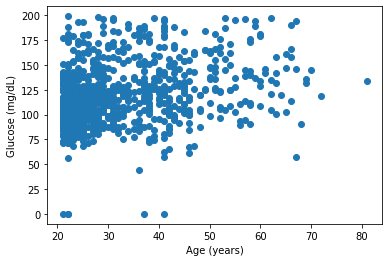

In [178]:
plt.scatter('Age','Glucose',data=df)
plt.xlabel('Age (years)')
plt.ylabel('Glucose (mg/dL)')
plt.show()

In [183]:
df[['Age','Glucose']].corr()

,Age,Glucose
Age,1.000000,0.263514
Glucose,0.263514,1.000000


From the plot and crosstab data it clearly visible that Age & Glucose have low degree of correlation. 

### A plot to see the distribution of Outcome variable

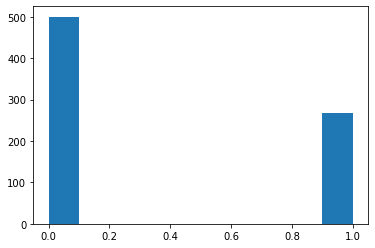

In [242]:
plt.hist('Outcome',data=df)
plt.show()


### understanding the distribution of all numerical features except outcome

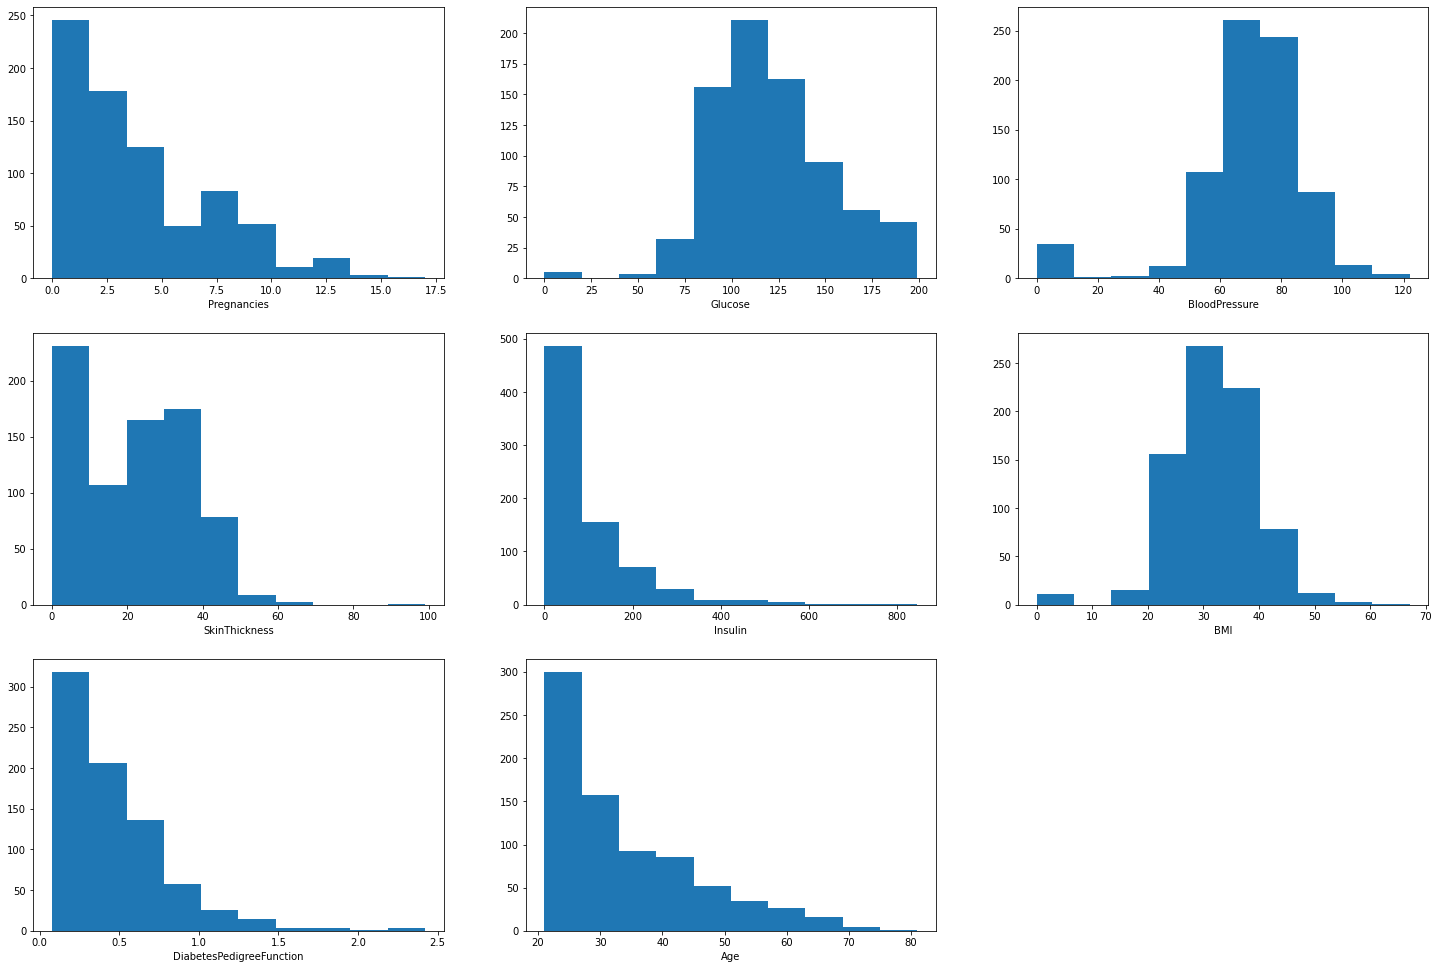

In [232]:
plt.figure(figsize=(25,17))
c=1
for i in df.columns[:-1]:
    plt.subplot(3,3,c)
    plt.xlabel(i)
    plt.hist(df[i])
    c +=1
plt.show()  

From the plots it can be observed that (Glucose , SkinThickness, BMI) seem to be normally distributed

And all other variables are skewed 

Pregnancies : right skewed

BloodPressure : left skewed

Insulin : right skewed

DiabetesPedigreeFunction : right skewed 

Age : right skewed

### Based on the skewness value variables divided into symmetrical, moderately skewed and highly skewed.

In [241]:
c=1
for i in df.columns[:-1]:
    print(i + ' : ' + str(df[i].skew()))

Pregnancies : 0.9016739791518588
Glucose : 0.17375350179188992
BloodPressure : -1.8436079833551302
SkinThickness : 0.10937249648187608
Insulin : 2.272250858431574
BMI : -0.42898158845356543
DiabetesPedigreeFunction : 1.919911066307204
Age : 1.1295967011444805


Based on the skewness value variables can be classified as symmetrical, moderately skewed and highly skewed.

 * A varible is symmetrical variable if skew value is between -0.5 & 0.5

 * A varible is moderatley skewed variable if skew value is between -1 & -0.5 or 0.5 & 1

 * A varible is highly skewed variable if skew value is below -1 or above 1

Symmetrical variables         : ( Glucose , SkinThickness, BMI )

moderatley skewed variables   : ( Pregnancies )

highly skewed variables       : ( BloodPressure , Insulin , DiabetesPedigreeFunction , Age )


### Measures of central tendency and dispersion for skewed data.

Median is a measure of central tendency that is good to use with skewed data.
Because median is not influenced by outliers.

IQR is measure of dispersion that is used for skewed data.
IQR represents middle 50%  of the data. Its not affected by extreme values .


### plotting the variables to find out the varibles with outilers 

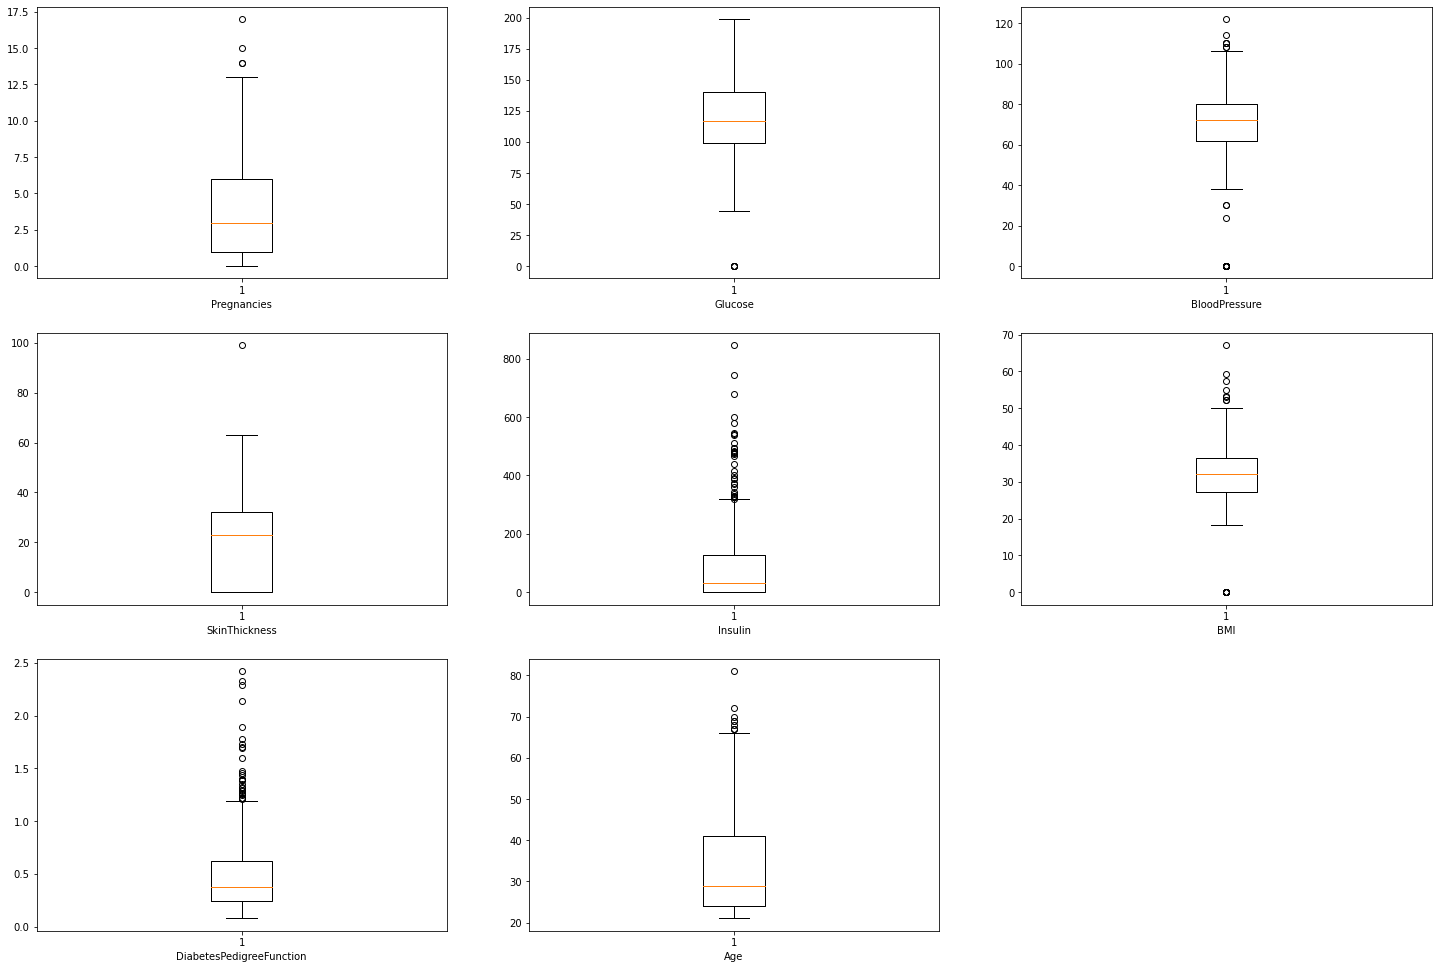

In [240]:
plt.figure(figsize=(25,17))
c=1
for i in df.columns[:-1]:
    plt.subplot(3,3,c)
    plt.xlabel(i)
    plt.boxplot(df[i])
    c +=1
plt.show()  